## Import statements

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, SubsetRandomSampler
import torchvision
from torchvision import transforms
import os
from datetime import datetime  # For generating timestamped folder names
from model import *
from data import *
from utils import *
from train import *
from tqdm.auto import tqdm
import os

# Check if GPU is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Hyperparameters & Dataset loading

In [11]:
params = {
    'batch_size': 128,
    'learning_rate': 0.01,
    'save_dir': 'model_ckpts',
    'weight_decay': 1e-4,
    'grad_clip': 0.1,
}

In [12]:
#Normal case
train_data_loader = create_train_data_loader(params["batch_size"])

#num instances ranging from 1,10,100,1000
train_data_num_1_loader = create_train_data_loader_with_num_instances(1, params["batch_size"])
train_data_num_10_loader = create_train_data_loader_with_num_instances(10, params["batch_size"])
train_data_num_100_loader = create_train_data_loader_with_num_instances(100, params["batch_size"])
train_data_num_1000_loader = create_train_data_loader_with_num_instances(1000, params["batch_size"])

#Testing and validation for all cases
test_data_loader, validation_data_loader = create_test_and_validation_data_loader(params["batch_size"])


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [13]:
def get_model_weight_path(experiment, epoch_num=None):
    directory = os.path.join(params["save_dir"], experiment)
    if epoch_num == None:
        # Get a list of all files in the directory
        files = os.listdir(directory)

        # Filter out only the files (exclude directories)
        files = [f for f in files if os.path.isfile(os.path.join(directory, f))]

        # Sort the files by their modification time in descending order (most recent first)
        files.sort(key=lambda x: os.path.getmtime(os.path.join(directory, x)), reverse=True)

        # Get the name of the most recently added file
        model_file = files[0] if files else None
    else:
        model_file = f"model_epoch_{epoch_num}.pt"
    return os.path.join(directory, model_file)


# <u>Experiment 1: Full dataset</u>

### 1.1 Train the model

In [14]:
full_experiment = "full"
full_cifar_model = CIFARClassifier()
full_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [15]:
checkpoint = get_model_weight_path(full_experiment)
checkpoint

'model_ckpts\\full\\model_epoch_3.pt'

In [16]:
full_epoch_numbers, full_training_losses, full_training_accuracy, full_validation_losses, full_validation_accuracy = train_model(
    full_cifar_model,
    train_data_loader,
    validation_data_loader,
    5,
    params,
    full_experiment,
    epoch_saver_count=1,
    resume_checkpoint=checkpoint
)

Model checkpoint model_ckpts\full\model_epoch_3.pt loaded! Will resume the epochs from number #3


Total Epochs: 0.0% |          | 0/5 [00:00<?, ?it/s]

Epoch 4/8:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 4: train_loss: 0.5560596749148405 | train_accuracy: 0.81729 | val_loss: 0.9428276618321737 | val_accuracy: 0.692 
Going to save model @ Epoch:4
Save checkpointed the model at the path model_ckpts\full\model_epoch_4.pt


Epoch 5/8:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 5: train_loss: 0.7795559419390491 | train_accuracy: 0.74532 | val_loss: 0.8275590091943741 | val_accuracy: 0.7246666666666667 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\full\model_epoch_5.pt


Epoch 6/8:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 6: train_loss: 0.6964977306249501 | train_accuracy: 0.77395 | val_loss: 0.6716544429461161 | val_accuracy: 0.78 
Going to save model @ Epoch:6
Save checkpointed the model at the path model_ckpts\full\model_epoch_6.pt


Epoch 7/8:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 7: train_loss: 0.515797313026455 | train_accuracy: 0.82971 | val_loss: 0.43653594702482224 | val_accuracy: 0.8626666666666667 
Going to save model @ Epoch:7
Save checkpointed the model at the path model_ckpts\full\model_epoch_7.pt


Epoch 8/8:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 8: train_loss: 0.33194947247500617 | train_accuracy: 0.88992 | val_loss: 0.33239054804046947 | val_accuracy: 0.894 
Going to save model @ Epoch:8
Save checkpointed the model at the path model_ckpts\full\model_epoch_8.pt


### Training for 3 more epochs

In [41]:
checkpoint = get_model_weight_path(full_experiment)
checkpoint

'model_ckpts\\full\\model_epoch_26.pt'

In [42]:
full_epoch_numbers, full_training_losses, full_training_accuracy, full_validation_losses, full_validation_accuracy = train_model(
    full_cifar_model,
    train_data_loader,
    validation_data_loader,
    10,
    params,
    full_experiment,
    epoch_saver_count=1,
    resume_checkpoint=checkpoint
)

Model checkpoint model_ckpts\full\model_epoch_26.pt loaded! Will resume the epochs from number #26


Total Epochs: 0.0% |          | 0/10 [00:00<?, ?it/s]

Epoch 27/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 27: train_loss: 0.2871248465498238 | train_accuracy: 0.90628 | val_loss: 0.4187946133315563 | val_accuracy: 0.872 
Going to save model @ Epoch:27
Save checkpointed the model at the path model_ckpts\full\model_epoch_27.pt


Epoch 28/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 28: train_loss: 0.43852435338222767 | train_accuracy: 0.85589 | val_loss: 0.585712139805158 | val_accuracy: 0.8233333333333334 
Going to save model @ Epoch:28
Save checkpointed the model at the path model_ckpts\full\model_epoch_28.pt


Epoch 29/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 29: train_loss: 0.5861884317815761 | train_accuracy: 0.81105 | val_loss: 0.6018347317973772 | val_accuracy: 0.8146666666666667 
Going to save model @ Epoch:29
Save checkpointed the model at the path model_ckpts\full\model_epoch_29.pt


Epoch 30/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 30: train_loss: 0.6072755540575823 | train_accuracy: 0.80406 | val_loss: 0.6466673662265142 | val_accuracy: 0.7846666666666666 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\full\model_epoch_30.pt


Epoch 31/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 31: train_loss: 0.5693585203431756 | train_accuracy: 0.81427 | val_loss: 0.6051738634705544 | val_accuracy: 0.806 
Going to save model @ Epoch:31
Save checkpointed the model at the path model_ckpts\full\model_epoch_31.pt


Epoch 32/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 32: train_loss: 0.519398749827424 | train_accuracy: 0.83067 | val_loss: 0.5293100997805595 | val_accuracy: 0.8293333333333334 
Going to save model @ Epoch:32
Save checkpointed the model at the path model_ckpts\full\model_epoch_32.pt


Epoch 33/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 33: train_loss: 0.44662675436805277 | train_accuracy: 0.85328 | val_loss: 0.4034501984715462 | val_accuracy: 0.87 
Going to save model @ Epoch:33
Save checkpointed the model at the path model_ckpts\full\model_epoch_33.pt


Epoch 34/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 34: train_loss: 0.35935673287228853 | train_accuracy: 0.8809 | val_loss: 0.35937027384837467 | val_accuracy: 0.88 
Going to save model @ Epoch:34
Save checkpointed the model at the path model_ckpts\full\model_epoch_34.pt


Epoch 35/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 35: train_loss: 0.27873318317486806 | train_accuracy: 0.90798 | val_loss: 0.32479702681303024 | val_accuracy: 0.8933333333333333 
Going to save model @ Epoch:35
Save checkpointed the model at the path model_ckpts\full\model_epoch_35.pt


Epoch 36/36:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch 36: train_loss: 0.22891704030239673 | train_accuracy: 0.92543 | val_loss: 0.32250479857126874 | val_accuracy: 0.8953333333333333 
Going to save model @ Epoch:36
Save checkpointed the model at the path model_ckpts\full\model_epoch_36.pt


### 1.2 Test the model

In [46]:
full_cifar_test_accuracy, full_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, full_cifar_model, test_data_loader)
print(f"Test loss: {full_cifar_test_loss} | Test accuracy: {full_cifar_test_accuracy}")

Test loss: 0.3408265669844044 | Test accuracy: 0.8917647058823529


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


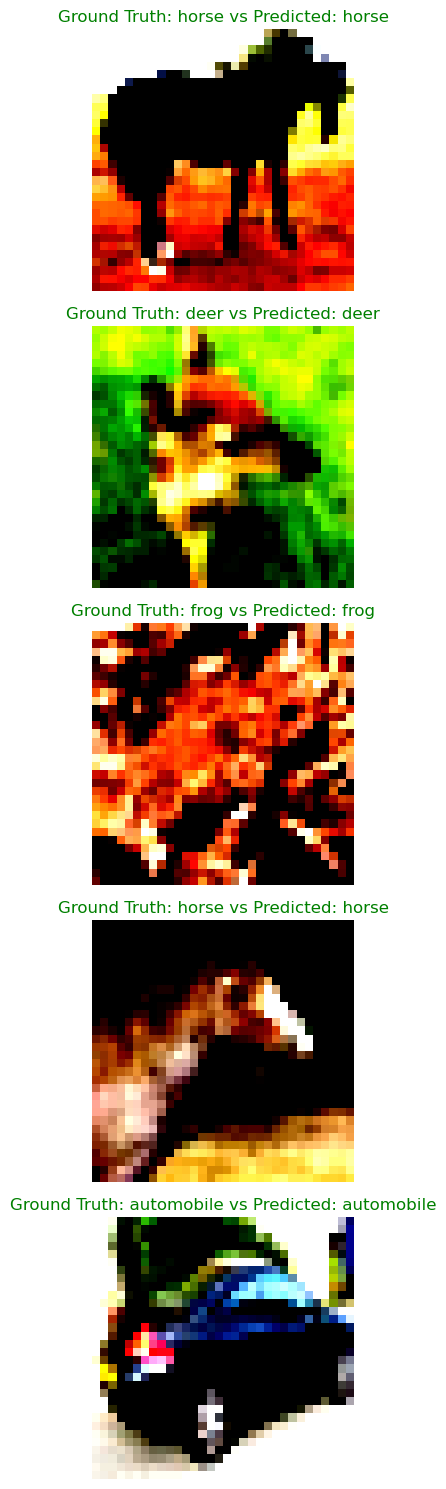

In [44]:
show_predictions(full_cifar_model, test_data_loader)

### 1.3 Plot graphs

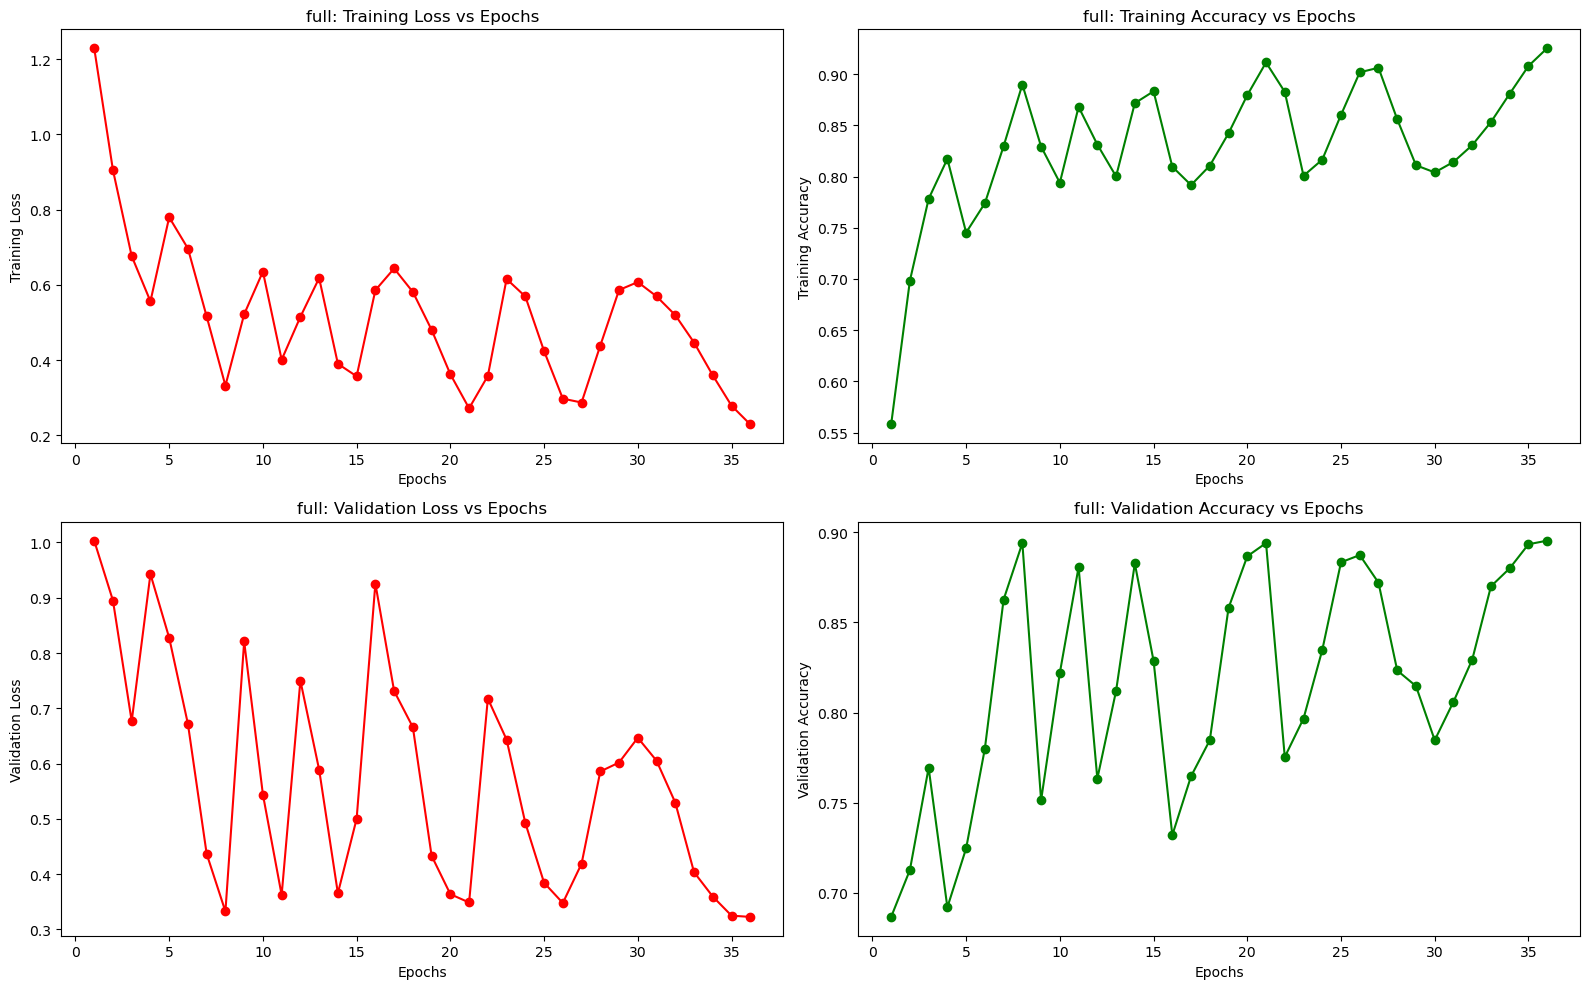

In [45]:
plot_model_training_stats(full_experiment, full_epoch_numbers, full_training_losses, full_validation_losses, full_training_accuracy, full_validation_accuracy)

# <u>Experiment 2: 1 instance per class dataset</u>

### 2.1 Train the model

In [51]:
one_experiment = "one"
one_cifar_model = CIFARClassifier()
one_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [ ]:
one_epoch_numbers, one_training_losses, one_training_accuracy, one_validation_losses, one_validation_accuracy = train_model(
    one_cifar_model,
    train_data_num_1_loader,
    validation_data_loader,
    50,
    params,
    one_experiment,
    epoch_saver_count=1,
    resume_checkpoint=None
)

### 2.2 Test the model

In [54]:
one_cifar_test_accuracy, one_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, one_cifar_model, test_data_loader)
print(f"Test loss: {one_cifar_test_loss} | Test accuracy: {one_cifar_test_accuracy}")

Test loss: 13.810839126359172 | Test accuracy: 0.16258823529411764


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


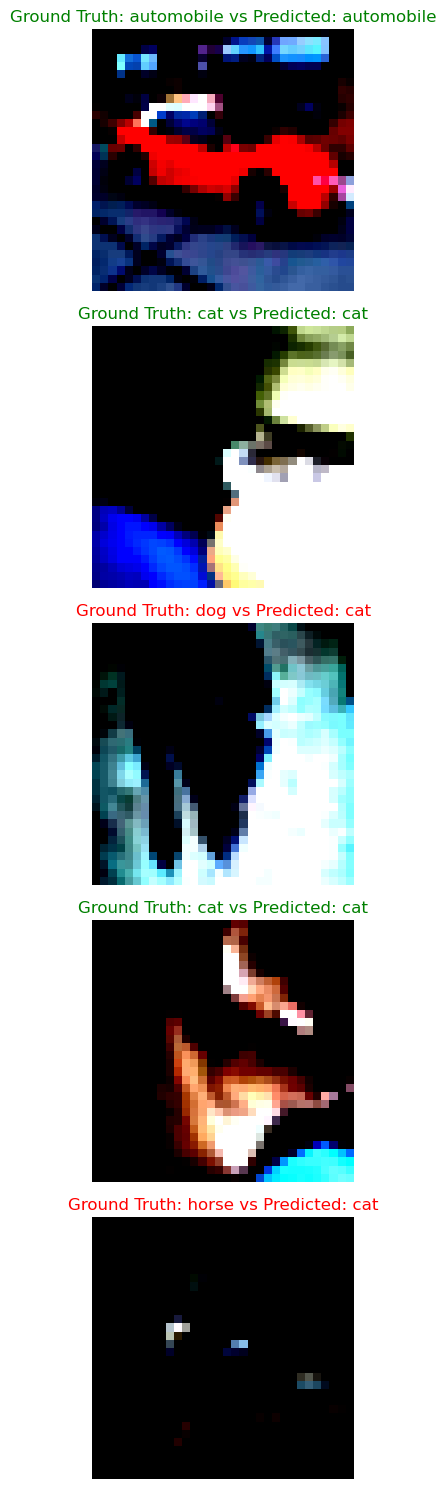

In [55]:
show_predictions(one_cifar_model, test_data_loader)

### 2.3 Plot graphs

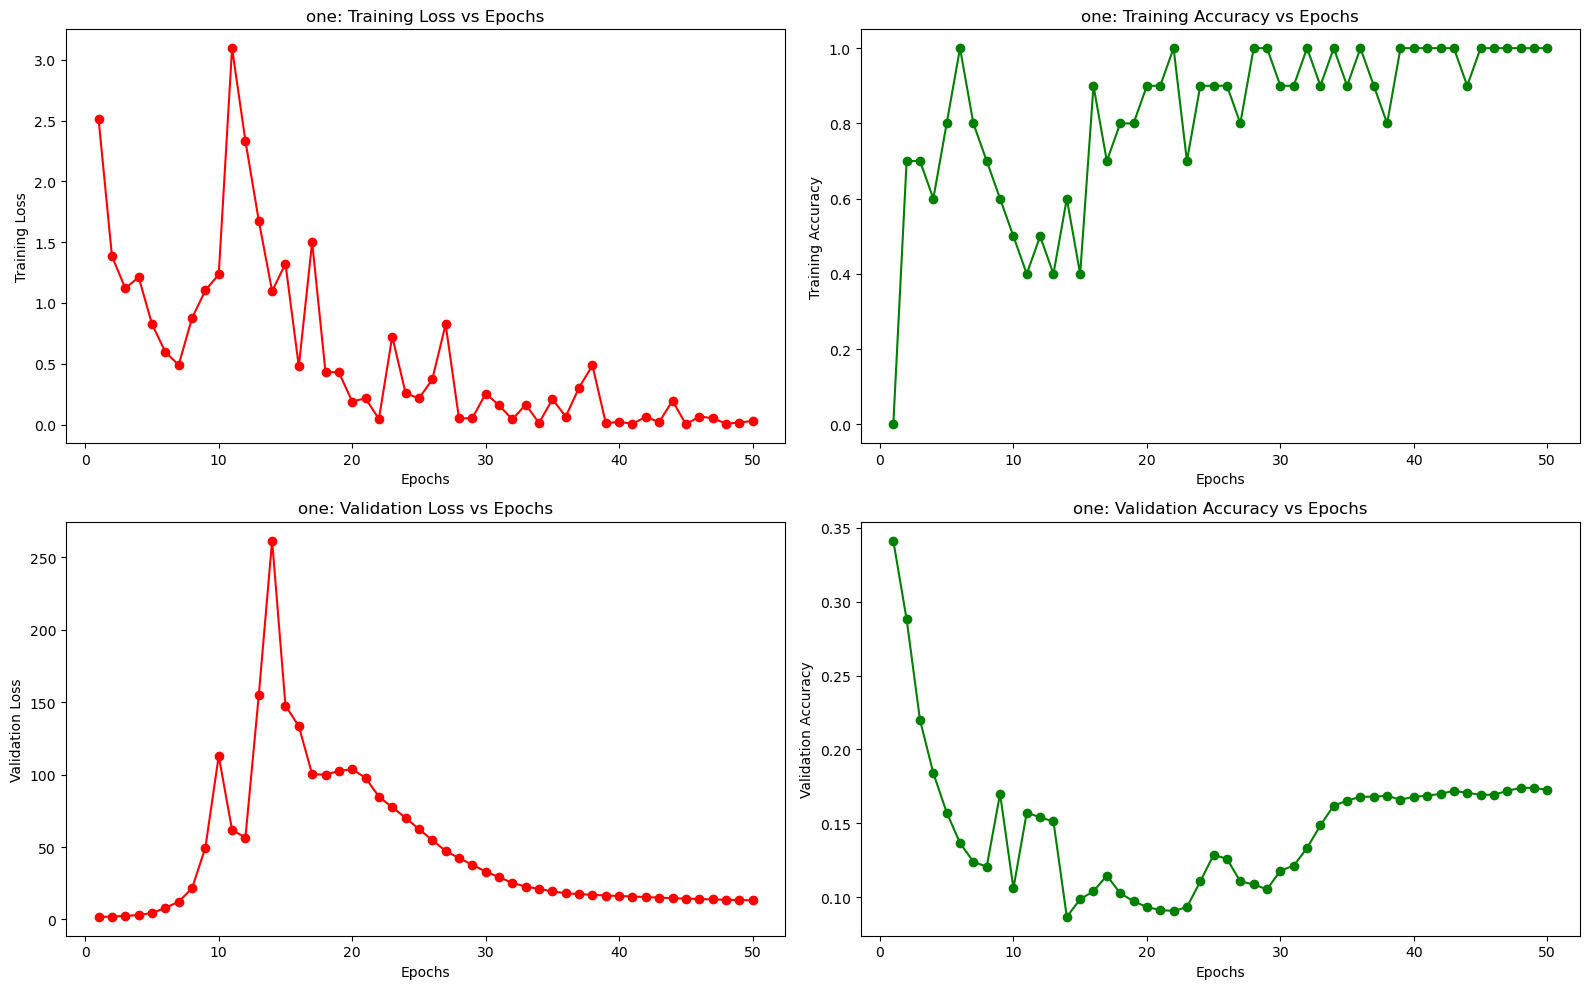

In [56]:
plot_model_training_stats(one_experiment, one_epoch_numbers, one_training_losses, one_validation_losses, one_training_accuracy, one_validation_accuracy)

# <u>Experiment 3: 10 instance per class dataset</u>

### 3.1 Train the model

In [57]:
ten_experiment = "ten"
ten_cifar_model = CIFARClassifier()
ten_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [58]:
ten_epoch_numbers, ten_training_losses, ten_training_accuracy, ten_validation_losses, ten_validation_accuracy = train_model(
    ten_cifar_model,
    train_data_num_10_loader,
    validation_data_loader,
    30,
    params,
    ten_experiment,
    epoch_saver_count=5,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/30 [00:00<?, ?it/s]

Epoch 1/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1: train_loss: 2.438701868057251 | train_accuracy: 0.14 | val_loss: 2.301729162534078 | val_accuracy: 0.098 


Epoch 2/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2: train_loss: 2.1750593185424805 | train_accuracy: 0.25 | val_loss: 2.295880297819773 | val_accuracy: 0.128 


Epoch 3/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3: train_loss: 2.064572334289551 | train_accuracy: 0.23 | val_loss: 2.291283965110779 | val_accuracy: 0.18333333333333332 


Epoch 4/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4: train_loss: 2.1907713413238525 | train_accuracy: 0.24 | val_loss: 3.153894305229187 | val_accuracy: 0.09866666666666667 


Epoch 5/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5: train_loss: 2.571781873703003 | train_accuracy: 0.24 | val_loss: 10.997092882792154 | val_accuracy: 0.10266666666666667 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\ten\model_epoch_5.pt


Epoch 6/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6: train_loss: 2.4636662006378174 | train_accuracy: 0.18 | val_loss: 29.56259361902873 | val_accuracy: 0.10733333333333334 


Epoch 7/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 7: train_loss: 2.6680777072906494 | train_accuracy: 0.2 | val_loss: 81.22862116495769 | val_accuracy: 0.10333333333333333 


Epoch 8/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 8: train_loss: 2.4143362045288086 | train_accuracy: 0.18 | val_loss: 34.65058898925781 | val_accuracy: 0.11133333333333334 


Epoch 9/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 9: train_loss: 2.1646840572357178 | train_accuracy: 0.18 | val_loss: 56.04788366953532 | val_accuracy: 0.13066666666666665 


Epoch 10/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 10: train_loss: 1.9788380861282349 | train_accuracy: 0.3 | val_loss: 42.05625597635905 | val_accuracy: 0.10866666666666666 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\ten\model_epoch_10.pt


Epoch 11/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 11: train_loss: 1.9074091911315918 | train_accuracy: 0.3 | val_loss: 39.30360539754232 | val_accuracy: 0.112 


Epoch 12/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 12: train_loss: 1.7794413566589355 | train_accuracy: 0.33 | val_loss: 15.612537622451782 | val_accuracy: 0.14933333333333335 


Epoch 13/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 13: train_loss: 1.783567190170288 | train_accuracy: 0.31 | val_loss: 22.207047939300537 | val_accuracy: 0.12866666666666668 


Epoch 14/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 14: train_loss: 1.605619192123413 | train_accuracy: 0.43 | val_loss: 19.50521723429362 | val_accuracy: 0.14466666666666667 


Epoch 15/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 15: train_loss: 1.4790732860565186 | train_accuracy: 0.44 | val_loss: 10.72496223449707 | val_accuracy: 0.15266666666666667 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\ten\model_epoch_15.pt


Epoch 16/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 16: train_loss: 1.3494895696640015 | train_accuracy: 0.43 | val_loss: 6.773146589597066 | val_accuracy: 0.16466666666666666 


Epoch 17/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 17: train_loss: 1.5888702869415283 | train_accuracy: 0.39 | val_loss: 6.532244483629863 | val_accuracy: 0.168 


Epoch 18/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 18: train_loss: 1.4042080640792847 | train_accuracy: 0.48 | val_loss: 7.171717524528503 | val_accuracy: 0.17733333333333334 


Epoch 19/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 19: train_loss: 1.1883748769760132 | train_accuracy: 0.54 | val_loss: 6.702107032140096 | val_accuracy: 0.18466666666666667 


Epoch 20/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 20: train_loss: 1.2517235279083252 | train_accuracy: 0.51 | val_loss: 6.0666071971257525 | val_accuracy: 0.19066666666666668 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\ten\model_epoch_20.pt


Epoch 21/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 21: train_loss: 1.2200788259506226 | train_accuracy: 0.49 | val_loss: 5.189392725626628 | val_accuracy: 0.20733333333333334 


Epoch 22/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 22: train_loss: 1.0711156129837036 | train_accuracy: 0.56 | val_loss: 4.360815346240997 | val_accuracy: 0.238 


Epoch 23/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 23: train_loss: 1.0377261638641357 | train_accuracy: 0.64 | val_loss: 3.751165231068929 | val_accuracy: 0.24066666666666667 


Epoch 24/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 24: train_loss: 1.0727152824401855 | train_accuracy: 0.57 | val_loss: 3.4242800076802573 | val_accuracy: 0.25933333333333336 


Epoch 25/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 25: train_loss: 1.1052945852279663 | train_accuracy: 0.55 | val_loss: 3.2559513250986734 | val_accuracy: 0.26666666666666666 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\ten\model_epoch_25.pt


Epoch 26/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 26: train_loss: 1.048396110534668 | train_accuracy: 0.57 | val_loss: 3.140617072582245 | val_accuracy: 0.2713333333333333 


Epoch 27/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 27: train_loss: 0.9384855628013611 | train_accuracy: 0.65 | val_loss: 3.023703634738922 | val_accuracy: 0.272 


Epoch 28/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 28: train_loss: 0.9955981969833374 | train_accuracy: 0.63 | val_loss: 2.9524004658063254 | val_accuracy: 0.278 


Epoch 29/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 29: train_loss: 1.0207185745239258 | train_accuracy: 0.56 | val_loss: 2.8948088884353638 | val_accuracy: 0.2753333333333333 


Epoch 30/30:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 30: train_loss: 0.9942701458930969 | train_accuracy: 0.63 | val_loss: 2.8362732927004495 | val_accuracy: 0.278 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\ten\model_epoch_30.pt


### 3.2 Test the model


In [59]:
ten_cifar_test_accuracy, ten_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, ten_cifar_model, test_data_loader)
print(f"Test loss: {ten_cifar_test_loss} | Test accuracy: {ten_cifar_test_accuracy}")

Test loss: 2.846184591748821 | Test accuracy: 0.26905882352941174


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


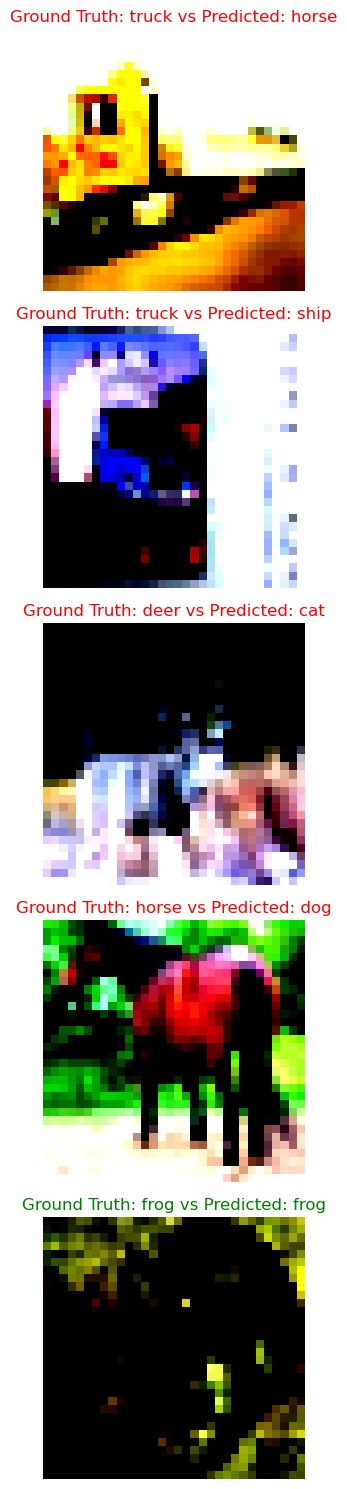

In [60]:
show_predictions(ten_cifar_model, test_data_loader)

### 3.3 Plot graphs

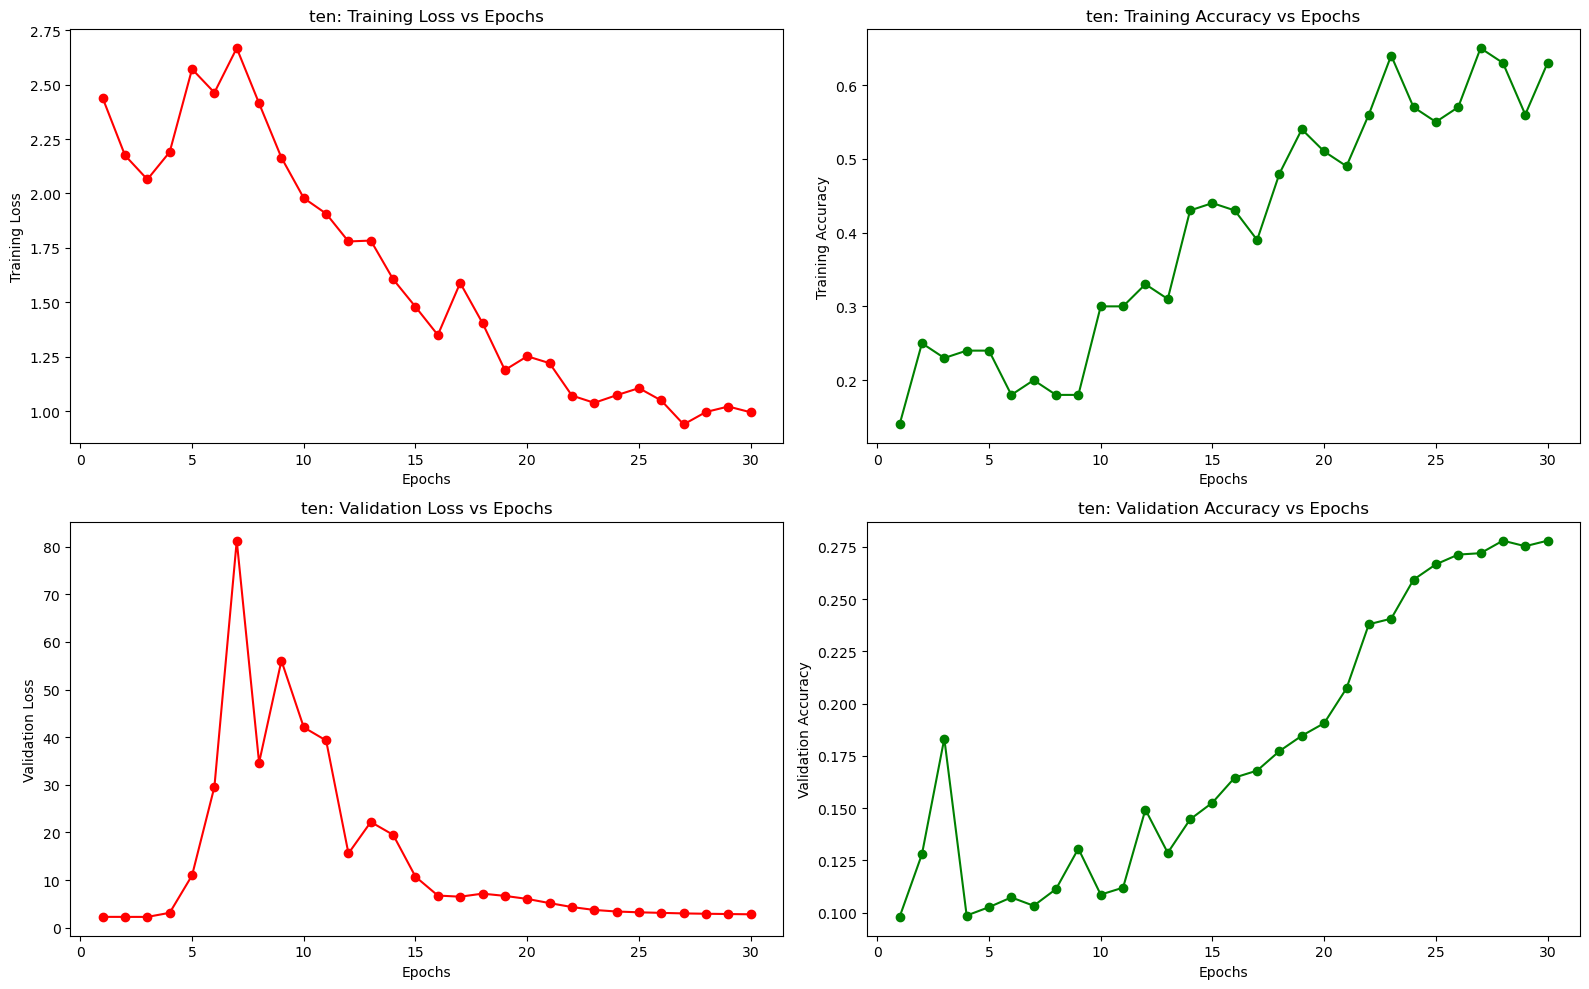

In [61]:
plot_model_training_stats(ten_experiment, ten_epoch_numbers, ten_training_losses, ten_validation_losses, ten_training_accuracy, ten_validation_accuracy)

# <u>Experiment 4: 100 instance per class dataset</u>

### 4.1 Train the model

In [62]:
hund_experiment = "hundred"
hund_cifar_model = CIFARClassifier()
hund_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [63]:
hund_epoch_numbers, hund_training_losses, hund_training_accuracy, hund_validation_losses, hund_validation_accuracy = train_model(
    hund_cifar_model,
    train_data_num_100_loader,
    validation_data_loader,
    30,
    params,
    hund_experiment,
    epoch_saver_count=5,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/30 [00:00<?, ?it/s]

Epoch 1/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1: train_loss: 2.2142560482025146 | train_accuracy: 0.173 | val_loss: 2.2089362343152366 | val_accuracy: 0.16533333333333333 


Epoch 2/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 2: train_loss: 2.001001313328743 | train_accuracy: 0.253 | val_loss: 1.9872140487035115 | val_accuracy: 0.2793333333333333 


Epoch 3/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 3: train_loss: 1.8540187180042267 | train_accuracy: 0.313 | val_loss: 2.2681242326895394 | val_accuracy: 0.29333333333333333 


Epoch 4/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 4: train_loss: 1.8558744490146637 | train_accuracy: 0.316 | val_loss: 3.6316401958465576 | val_accuracy: 0.21733333333333332 


Epoch 5/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 5: train_loss: 1.8118456602096558 | train_accuracy: 0.33 | val_loss: 2.525432030359904 | val_accuracy: 0.25933333333333336 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_5.pt


Epoch 6/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 6: train_loss: 1.8119480460882187 | train_accuracy: 0.314 | val_loss: 3.127165953318278 | val_accuracy: 0.18333333333333332 


Epoch 7/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 7: train_loss: 1.7390774190425873 | train_accuracy: 0.367 | val_loss: 2.034434199333191 | val_accuracy: 0.2986666666666667 


Epoch 8/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 8: train_loss: 1.743619829416275 | train_accuracy: 0.344 | val_loss: 3.263115386168162 | val_accuracy: 0.16266666666666665 


Epoch 9/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 9: train_loss: 1.861611768603325 | train_accuracy: 0.311 | val_loss: 3.5213473240534463 | val_accuracy: 0.22533333333333333 


Epoch 10/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 10: train_loss: 1.8576610088348389 | train_accuracy: 0.315 | val_loss: 2.160454014937083 | val_accuracy: 0.18733333333333332 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_10.pt


Epoch 11/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 11: train_loss: 1.7634391635656357 | train_accuracy: 0.319 | val_loss: 2.0053734282652536 | val_accuracy: 0.31266666666666665 


Epoch 12/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 12: train_loss: 1.6797182261943817 | train_accuracy: 0.365 | val_loss: 1.862046738465627 | val_accuracy: 0.35333333333333333 


Epoch 13/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 13: train_loss: 1.5700034648180008 | train_accuracy: 0.45 | val_loss: 1.954856852690379 | val_accuracy: 0.3453333333333333 


Epoch 14/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 14: train_loss: 1.5547405630350113 | train_accuracy: 0.438 | val_loss: 1.7062678237756093 | val_accuracy: 0.38266666666666665 


Epoch 15/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 15: train_loss: 1.52136792242527 | train_accuracy: 0.44 | val_loss: 2.039339224497477 | val_accuracy: 0.332 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_15.pt


Epoch 16/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 16: train_loss: 1.493695318698883 | train_accuracy: 0.444 | val_loss: 1.6561972002188365 | val_accuracy: 0.41733333333333333 


Epoch 17/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 17: train_loss: 1.4609871357679367 | train_accuracy: 0.473 | val_loss: 1.7377443512280781 | val_accuracy: 0.36933333333333335 


Epoch 18/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 18: train_loss: 1.5022422969341278 | train_accuracy: 0.416 | val_loss: 1.8800514737764995 | val_accuracy: 0.3413333333333333 


Epoch 19/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 19: train_loss: 1.3614183217287064 | train_accuracy: 0.497 | val_loss: 1.5174469153086345 | val_accuracy: 0.46266666666666667 


Epoch 20/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 20: train_loss: 1.3312488794326782 | train_accuracy: 0.516 | val_loss: 1.704182744026184 | val_accuracy: 0.41933333333333334 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_20.pt


Epoch 21/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 21: train_loss: 1.261817142367363 | train_accuracy: 0.543 | val_loss: 1.4923853476842244 | val_accuracy: 0.4553333333333333 


Epoch 22/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 22: train_loss: 1.2610686421394348 | train_accuracy: 0.536 | val_loss: 1.586696555217107 | val_accuracy: 0.436 


Epoch 23/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 23: train_loss: 1.1889646500349045 | train_accuracy: 0.573 | val_loss: 1.5132447481155396 | val_accuracy: 0.45066666666666666 


Epoch 24/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 24: train_loss: 1.1054528653621674 | train_accuracy: 0.578 | val_loss: 1.4001333216826122 | val_accuracy: 0.49266666666666664 


Epoch 25/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 25: train_loss: 1.0396894961595535 | train_accuracy: 0.607 | val_loss: 1.4750417669614155 | val_accuracy: 0.47533333333333333 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_25.pt


Epoch 26/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 26: train_loss: 0.9906102940440178 | train_accuracy: 0.618 | val_loss: 1.4561695456504822 | val_accuracy: 0.49733333333333335 


Epoch 27/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 27: train_loss: 0.9826037064194679 | train_accuracy: 0.635 | val_loss: 1.4127896130084991 | val_accuracy: 0.49866666666666665 


Epoch 28/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 28: train_loss: 0.9385454058647156 | train_accuracy: 0.643 | val_loss: 1.4218624532222748 | val_accuracy: 0.496 


Epoch 29/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 29: train_loss: 0.8993657827377319 | train_accuracy: 0.653 | val_loss: 1.401777724424998 | val_accuracy: 0.496 


Epoch 30/30:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 30: train_loss: 0.938608892261982 | train_accuracy: 0.641 | val_loss: 1.401476889848709 | val_accuracy: 0.5033333333333333 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\hundred\model_epoch_30.pt


### 4.2 Test the model

In [64]:
hund_cifar_test_accuracy, hund_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, hund_cifar_model, test_data_loader)
print(f"Test loss: {hund_cifar_test_loss} | Test accuracy: {hund_cifar_test_accuracy}")

Test loss: 1.3652508063102835 | Test accuracy: 0.5287058823529411


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


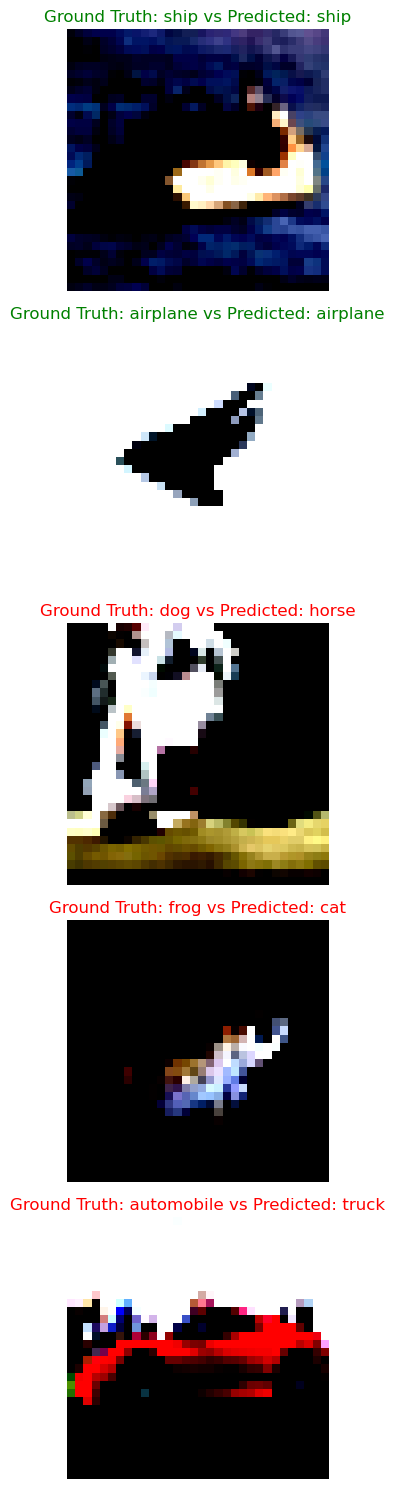

In [65]:
show_predictions(hund_cifar_model, test_data_loader)

### 4.3 Plot graphs

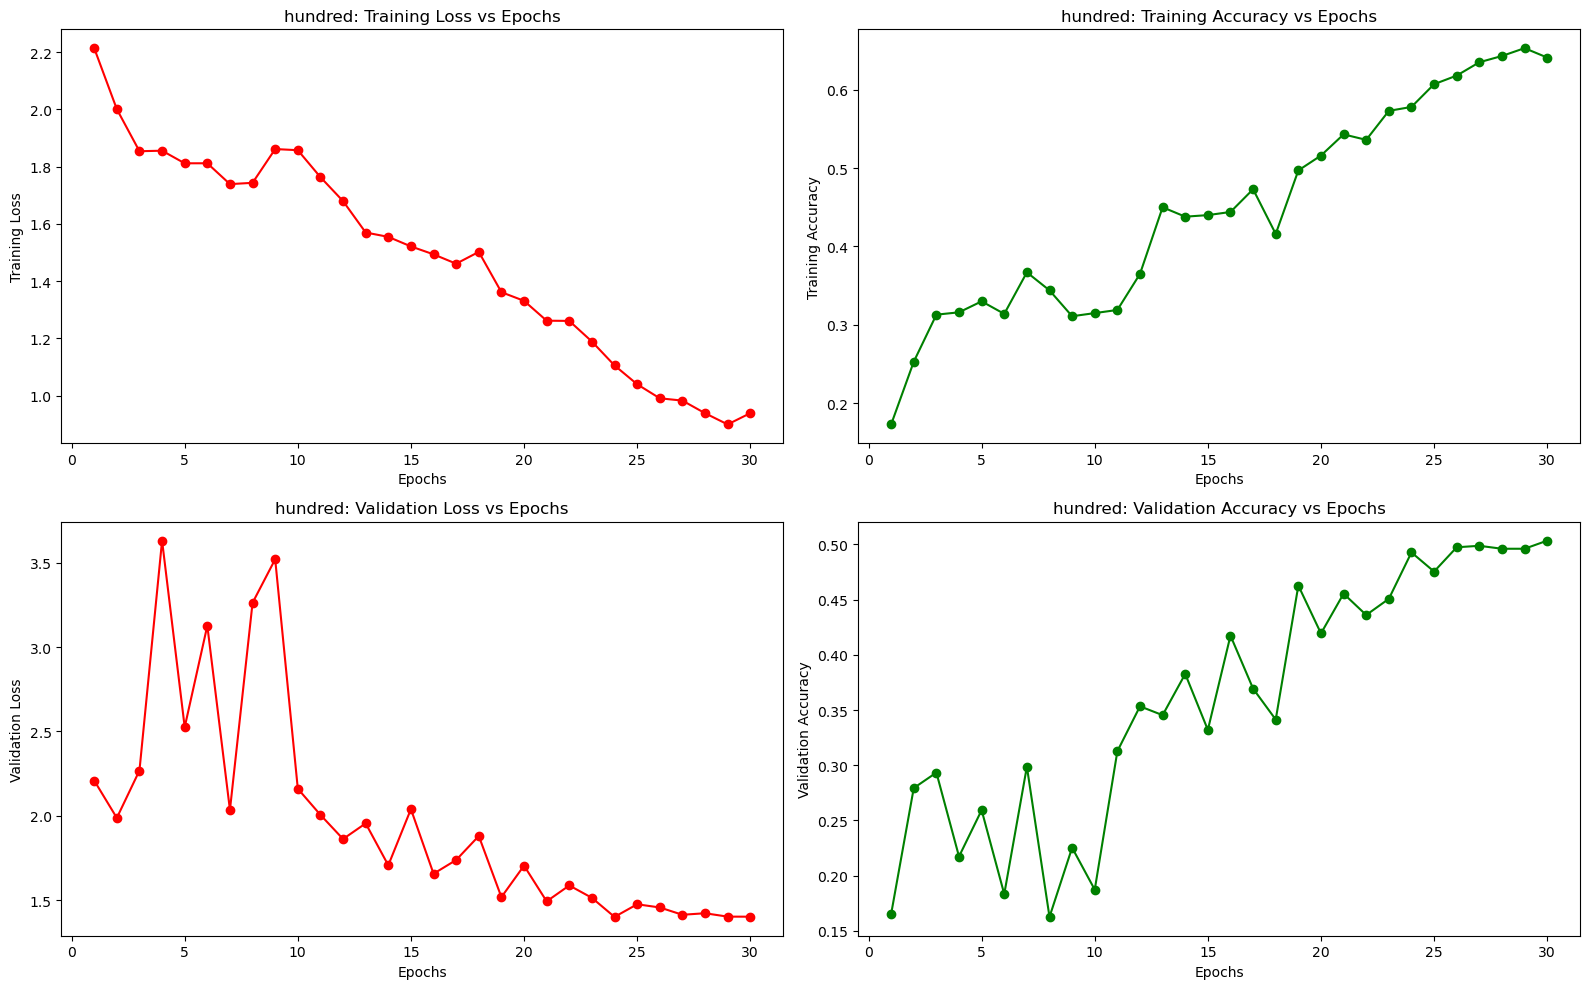

In [67]:
plot_model_training_stats(hund_experiment, hund_epoch_numbers, hund_training_losses, hund_validation_losses, hund_training_accuracy, hund_validation_accuracy)

# <u>Experiment 5: 1000 instance per class dataset</u>

### 5.1 Train the model

In [68]:
thous_experiment = "thousand"
thous_cifar_model = CIFARClassifier()
thous_cifar_model.to(device)

CIFARClassifier(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv3): Sequent

In [69]:
thous_epoch_numbers, thous_training_losses, thous_training_accuracy, thous_validation_losses, thous_validation_accuracy = train_model(
    thous_cifar_model,
    train_data_num_1000_loader,
    validation_data_loader,
    30,
    params,
    thous_experiment,
    epoch_saver_count=5,
    resume_checkpoint=None
)

Total Epochs: 0.0% |          | 0/30 [00:00<?, ?it/s]

Epoch 1/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1: train_loss: 1.8221175776252263 | train_accuracy: 0.3322 | val_loss: 1.621422549088796 | val_accuracy: 0.38333333333333336 


Epoch 2/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2: train_loss: 1.5388205579564542 | train_accuracy: 0.4274 | val_loss: 1.7665257255236309 | val_accuracy: 0.43066666666666664 


Epoch 3/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3: train_loss: 1.4081216673307781 | train_accuracy: 0.4856 | val_loss: 1.5320028066635132 | val_accuracy: 0.4553333333333333 


Epoch 4/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4: train_loss: 1.3723059258883512 | train_accuracy: 0.4979 | val_loss: 1.5085932115713756 | val_accuracy: 0.47333333333333333 


Epoch 5/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5: train_loss: 1.36258635038062 | train_accuracy: 0.5112 | val_loss: 1.7323141992092133 | val_accuracy: 0.4166666666666667 
Going to save model @ Epoch:5
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_5.pt


Epoch 6/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6: train_loss: 1.362115490285656 | train_accuracy: 0.514 | val_loss: 1.6139285862445831 | val_accuracy: 0.4533333333333333 


Epoch 7/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7: train_loss: 1.3839715025092982 | train_accuracy: 0.5069 | val_loss: 2.3993889689445496 | val_accuracy: 0.38333333333333336 


Epoch 8/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8: train_loss: 1.3276266832894916 | train_accuracy: 0.536 | val_loss: 1.7288645505905151 | val_accuracy: 0.4093333333333333 


Epoch 9/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9: train_loss: 1.277283233932302 | train_accuracy: 0.5507 | val_loss: 1.8506950736045837 | val_accuracy: 0.508 


Epoch 10/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10: train_loss: 1.3388638058795204 | train_accuracy: 0.5363 | val_loss: 1.7498696545759838 | val_accuracy: 0.43733333333333335 
Going to save model @ Epoch:10
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_10.pt


Epoch 11/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11: train_loss: 1.1542822582812249 | train_accuracy: 0.6013 | val_loss: 1.344935377438863 | val_accuracy: 0.5466666666666666 


Epoch 12/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12: train_loss: 1.091656912731219 | train_accuracy: 0.6188 | val_loss: 2.3281423846880593 | val_accuracy: 0.412 


Epoch 13/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13: train_loss: 1.1019217975531952 | train_accuracy: 0.6176 | val_loss: 1.1208769629398982 | val_accuracy: 0.6146666666666667 


Epoch 14/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14: train_loss: 1.0214940211440944 | train_accuracy: 0.6478 | val_loss: 1.101630558570226 | val_accuracy: 0.6033333333333334 


Epoch 15/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15: train_loss: 0.9753192587743832 | train_accuracy: 0.6659 | val_loss: 1.0473612397909164 | val_accuracy: 0.6353333333333333 
Going to save model @ Epoch:15
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_15.pt


Epoch 16/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16: train_loss: 0.9204605666896964 | train_accuracy: 0.6757 | val_loss: 1.1231480638186138 | val_accuracy: 0.624 


Epoch 17/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17: train_loss: 0.8963559813137296 | train_accuracy: 0.6953 | val_loss: 0.9405379643042883 | val_accuracy: 0.6626666666666666 


Epoch 18/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18: train_loss: 0.8692956061302861 | train_accuracy: 0.7063 | val_loss: 1.014984592795372 | val_accuracy: 0.658 


Epoch 19/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19: train_loss: 0.809484912624842 | train_accuracy: 0.7219 | val_loss: 0.7733596712350845 | val_accuracy: 0.7373333333333333 


Epoch 20/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20: train_loss: 0.7421394224408306 | train_accuracy: 0.75 | val_loss: 1.0013479838768642 | val_accuracy: 0.682 
Going to save model @ Epoch:20
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_20.pt


Epoch 21/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21: train_loss: 0.707717203263995 | train_accuracy: 0.7603 | val_loss: 0.6561007350683212 | val_accuracy: 0.776 


Epoch 22/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22: train_loss: 0.6226238155666786 | train_accuracy: 0.7928 | val_loss: 0.6776781305670738 | val_accuracy: 0.7693333333333333 


Epoch 23/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23: train_loss: 0.5942702316030671 | train_accuracy: 0.8005 | val_loss: 0.6683274457852045 | val_accuracy: 0.8 


Epoch 24/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24: train_loss: 0.5253349176690548 | train_accuracy: 0.8264 | val_loss: 0.6387268255154291 | val_accuracy: 0.79 


Epoch 25/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25: train_loss: 0.4738671319394172 | train_accuracy: 0.8396 | val_loss: 0.5628305897116661 | val_accuracy: 0.808 
Going to save model @ Epoch:25
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_25.pt


Epoch 26/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26: train_loss: 0.4016455170474475 | train_accuracy: 0.8605 | val_loss: 0.5822397197286288 | val_accuracy: 0.8133333333333334 


Epoch 27/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27: train_loss: 0.3771945334310773 | train_accuracy: 0.8754 | val_loss: 0.5213878825306892 | val_accuracy: 0.8353333333333334 


Epoch 28/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28: train_loss: 0.3327377655460865 | train_accuracy: 0.8862 | val_loss: 0.5037202313542366 | val_accuracy: 0.8413333333333334 


Epoch 29/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29: train_loss: 0.3283226755978186 | train_accuracy: 0.8909 | val_loss: 0.5033332432309786 | val_accuracy: 0.8386666666666667 


Epoch 30/30:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 30: train_loss: 0.29735722986957697 | train_accuracy: 0.8999 | val_loss: 0.496710109213988 | val_accuracy: 0.8446666666666667 
Going to save model @ Epoch:30
Save checkpointed the model at the path model_ckpts\thousand\model_epoch_30.pt


### 5.2 Test the model

In [70]:
thous_cifar_test_accuracy, thous_cifar_test_loss = perform_test(nn.CrossEntropyLoss(), device, thous_cifar_model, test_data_loader)
print(f"Test loss: {thous_cifar_test_loss} | Test accuracy: {thous_cifar_test_accuracy}")

Test loss: 0.5066663516101553 | Test accuracy: 0.836


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


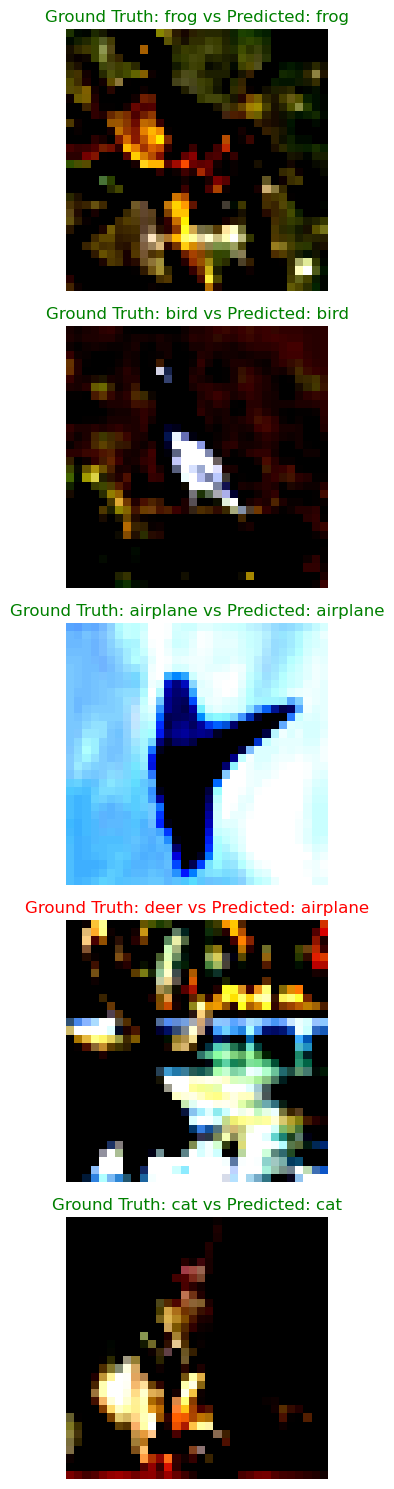

In [71]:
show_predictions(thous_cifar_model, test_data_loader)

### 5.3 Plot graphs

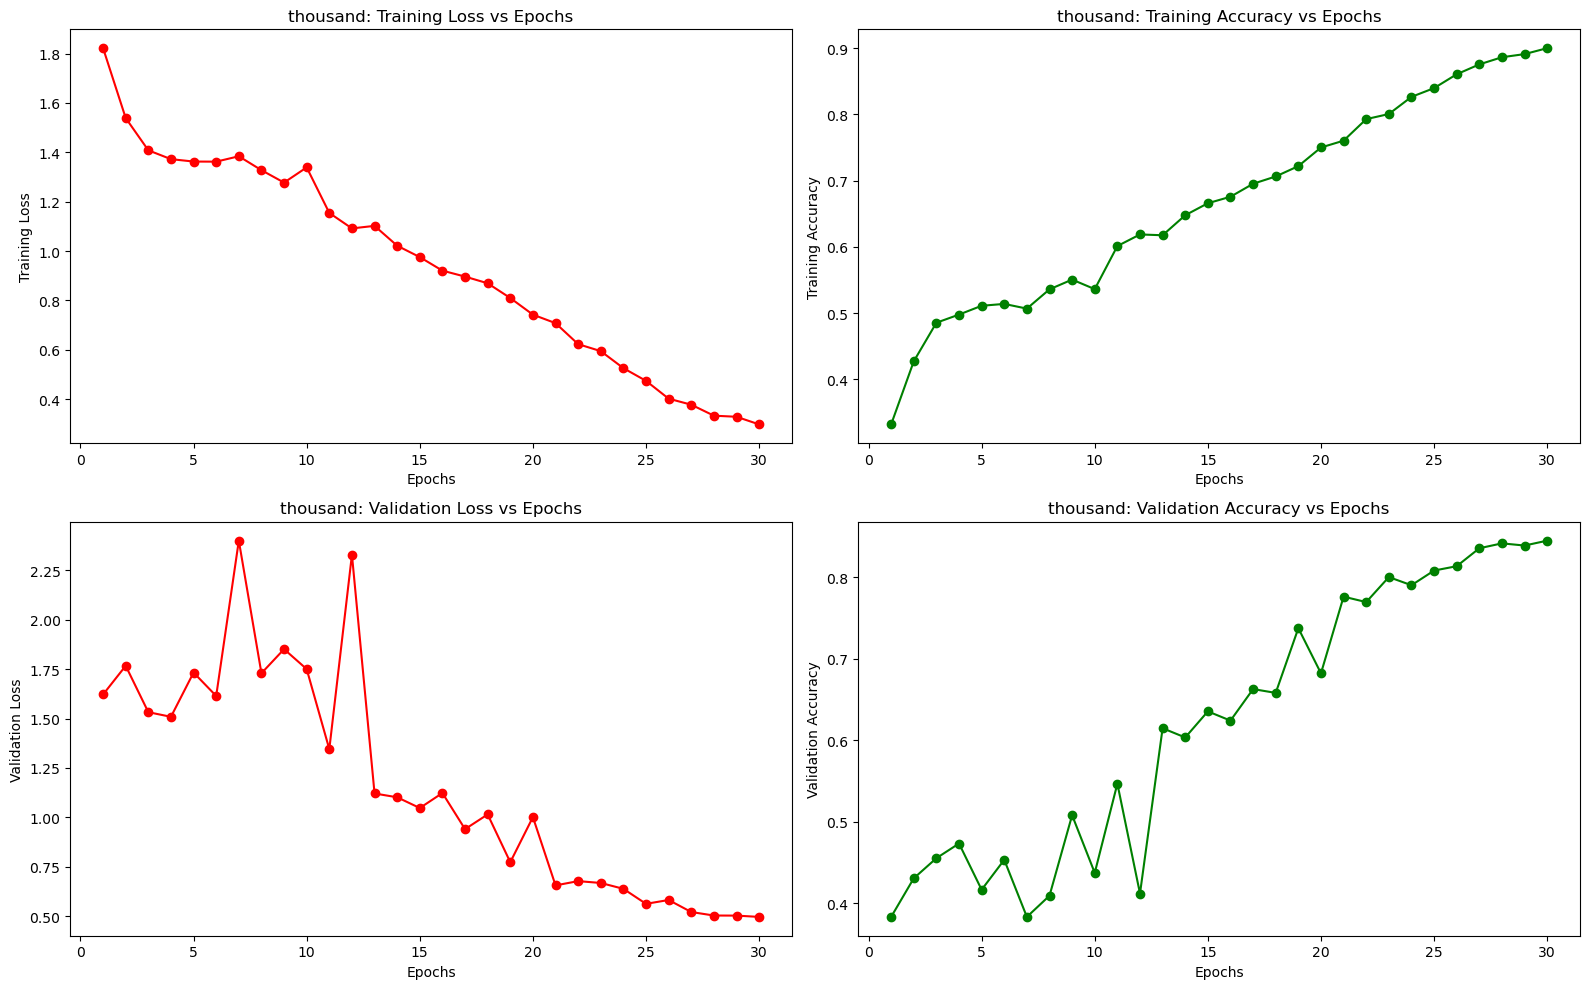

In [72]:
plot_model_training_stats(thous_experiment, thous_epoch_numbers, thous_training_losses, thous_validation_losses, thous_training_accuracy, thous_validation_accuracy)